Ce notebook python peut être exécuté sur le serveur JupyterHub de l'UGA en cliquant sur ce badge
[![badge](https://img.shields.io/badge/launch-UGA%20JupyterHub-F5A252.svg?logo=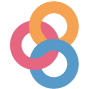)](https://jupyterhub.u-ga.fr/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Ffchatelain%2FOOPExamples&urlpath=lab%2Ftree%2FOOPExamples%2Foop_with_python.ipynb&branch=master)
(connexion avec vos identifiants Agalan)

# Python c'est de la programmation objet ?

Attention Python n'est pas qu'un simple langage de script... C'est aussi un langage orienté objet qui permet de définir des types d'objets, c'est à dire des classes, ainsi que les propriétés et les opérations associées, le tout de manière hautement dynamique.

Ce notebook a pour objectif de présenter les principes de la POO en Python, en reprenant les notions et exemples introduits dans les fiches de votre cours de POO java. Il est organisé selon les points ci-dessous : 

1. [La notion de classe et d'objets en python](#au-commencement-est-l-objet)
2. [Attributs, constructeurs et méthode](#attributs-constructeurs-methodes) 
3. [Encapsulation : visibilité et droits d'accès](#encapsulation)
4. [Héritage, polymorphisme et abstraction](#heritage)


Voici aussi quelques ressources en ligne, résumées partiellement dans ce notebook et utiles pour aller plus loin :
- une [documentation python](https://docs.python.org/fr/3/tutorial/classes.html) sur les classes et la POO 
- un [cours d'introduction de l'université Paris Diderot](https://python.sdv.univ-paris-diderot.fr/19_avoir_la_classe_avec_les_objets/) sur la POO en Python 
- un [excellent cours de la plateforme *Zeste de savoir*](https://zestedesavoir.com/tutoriels/954/notions-de-python-avancees/4-classes/) sur les spécificités de python pour la POO avec en particulier une bonne introduction sur les *MetaClasses* 

<a id='au-commencement-est-l-objet'></a>
## I. Au commencement est l'objet


Il existe en Java des classes *wrappers* pour les types primitifs &ndash; par exemple la classe `Integer` pour le type natif `ìnt` &ndash; afin de les convertir en objet lorsque c'est nécessaire (souvenez vous de l'*autoboxing*). 

Tout est objet en Python, même les types primitifs ! Une variable de type `int` est un objet construit à partir de la classe `int` !  Pareil pour les `float`, `string` ou autre `complex`. Et c'est également vrai pour les conteneurs comme les `list`, `tuple`, `dict`, ...

In [1]:
# Exemple pour un 'int'

# Appelons explicitement le constructeur par défaut
i = int()  # Equivalent à `i = 0`
# Affichons cet objet
print(i)
# Affichons son type
print(type(i))

0
<class 'int'>


In [2]:
# la même chose avec un 'float'
f = float()  # Equivalent à `f = 0.0`
print(f)
print(type(f))

0.0
<class 'float'>


In [3]:
# terminons avec un string 'str'
s = str()  # Equivalent à `s = ""`
print("'" + s + "'")
print(type(s))

''
<class 'str'>


In [4]:
# et aussi une liste
l = list()  # Equivalent à `l = []`
print(l)
print(type(l))

[]
<class 'list'>


On peut aller encore plus loin :  quel est le type d'un type d'objet (ici un `int`) ?

In [5]:
# (une instance du) type d'un type de int...
t = type(type(i))  #  Equivalent à `type(int)`
print(t)

<class 'type'>


Le type d'un objet est donc une instance (i.e. un objet) de la classe `type`.
On constate bien que **tout est objet** en python ! 

**Question :** si on continuait le raisonnement,  quel serait le type du type du type etc... ? A tester pour vérifier.

## La Classe en Python

Reprenons l'étude de nos chers Pangolins...

### La classe minimale

In [6]:
# Une premiere classe triviale
class Pangolin:
    pass


print(type(Pangolin))

<class 'type'>


La classe qu'on vient de définir est vide. Notons les points suivant :
- *Syntaxe* : il faut écrire au moins une ligne après la déclaration pour pouvoir définir la classe. On met ici le mot-clé `pass` qui ne fait rien...
- *Coding Style* : comme en java, la convention en Python pour nommer les classes est le *CamelCase*  (hormis les classes *builtins*  tels les types natifs comme `int`  etc... couramment écrits en lettres minuscules) : on met une capitale à la première lettre de chaque mot y compris le premier, par exemple `MonNomDeClasse`.
- *Typage* : lorsqu'on affiche le type de notre classe  `Pangolin`, il s'agit d'un type au même titre que `type(int)`. Nous avons donc créé un nouveau type !

Créons maintenant un de ces petits animaux, i.e. un objet qui est une *instance* de `Pangolin`

In [18]:
# Instancions un objet de la classe Pangolin
rantanplan = Pangolin()

print(rantanplan)
print(type(rantanplan))
isinstance(rantanplan, Pangolin)

<class '__main__.Pangolin'>


True

On peut remarquer que
- comme en java, le constructeur par défaut porte le nom de classe suivi d'une paire de parenthèses, ici  `Pangolin()`. Mais *pas besoin en Python* de faire précéder l'appel du constructeur par le mot clé `ǹew` pour instancier notre objet.
- Lorsqu'on affiche l'instance `rantanplan`, l'interpréteur nous rappelle qu'il s'agit d'un objet de type `Pangolin` (qui est par défaut dans un module exécutable, ce qui explique le préfixe `__main__.`) ainsi que son adresse en mémoire.
- l'appel de la fonction `isinstance()` nous permet de vérifier que l'instance `rantanplan` est bien issue de la classe  `Pangolin` 

### Et les attributs ?

Pour l'instant notre pauvre pangolin est bien démuni : il ne possède aucun attribut pour caractériser son état.

In [19]:
#  Un peu d'introspection : dans quel état j'erre ?
#  Il est possible d'accéder aux noms/valeurs des attributs que possède un objet.
rantanplan.__dict__

{}

Ajoutons lui quelques propriétés utiles. Ceci peut se faire *dynamiquement* sur l'objet en Python

In [9]:
#  Definissons quelques attributs : sa position et son nombre d'écailles
rantanplan.x = 0.0
rantanplan.y = 0.0
rantanplan.nbEcailles = 30

print("Ou es tu ? ({},{})".format(rantanplan.x, rantanplan.y))
print("Combien as tu d'écailles ? {}".format(rantanplan.nbEcailles))

rantanplan.__dict__

Ou es tu ? (0.0,0.0)
Combien as tu d'écailles ? 30


{'x': 0.0, 'y': 0.0, 'nbEcailles': 30}

Notre Pangolin a bien maintenant trois attributs tout neufs ! A l'inverse on peut même en supprimer si on veut

In [7]:
del rantanplan.nbEcailles
rantanplan.__dict__

NameError: name 'rantanplan' is not defined

**Attention**, c'est en général à éviter (sauf si vous avez une bonne raison de le faire) sous peine de casser du code. Pex l'instruction ci-dessous lève maintenant une erreur à l'exécution :

In [11]:
print("Combien as tu d'écailles ? {}".format(rantanplan.nbEcailles))  # AttributeError !

AttributeError: 'Pangolin' object has no attribute 'nbEcailles'

<a id='attributs-constructeurs-methodes'></a>
## II. Ajoutons des constructeurs et des méthodes !

Dans la philosophie dans la POO, on aime regrouper la définition des attributs et méthodes au sein de la même entité syntaxique, la classe. Toutes les instances de cette classe possèderont ainsi les mêmes propriétés lors de leur création.

En Java nous avions vu qu'on déclare les attributs puis on définit le(s) constructeur(s) dont le rôle est construire l'objet en mémoire et de l'initialiser. En Python, l'objet est initialisé à l'aide d'une méthode spéciale de sa classe, la méthode `__init__`. Cette dernière est appelée automatiquement à la création de l'objet et reçoit les arguments passés lors de l'instanciation.  C'est le **constructeur** qui définit et initialise les attributs de notre instance.

Voyons ceci avec notre classe Pangolin :

In [ ]:
class Pangolin:
    """
    Pangolin qui sait se deplacer et crier. Il est repéré par son abscisse x,
    son ordonnée y et possède nbEcailles écailles.
    """

    def __init__(self, xInit=0.0, yInit=0.0, nbEcailles=10):
        # Ci-dessous la définition et initialisation des attributs
        self.x = xInit
        self.y = yInit
        self.nbEcailles = nbEcailles

    # Définissons maintenant les méthodes

    def deplace(self, dx, dy):
        self.x += dx
        self.y += dy

    def crie(self):
        print("Gwwark Rhââgn Bwwikk")  # Cri du pangolin

**A ce stade, le paramètre `self` qui arrive en premier argument des méthodes doit certainement vous interpeller...**

Il désigne simplement l'objet sur lequel on applique la méthode, les autres paramètres de la méthode arrivant après. Contrairement à Java où les méthodes travaillent *implicitement* sur l'objet appelant, l'appel doit être *explicite* en Python. C'est certes un peu plus verbeux, mais ça peut être utile notamment dans des situations d'héritage multiple (pratique interdite en Java).

Contrairement au `this` de Java, `self`n'est pas un mot-clé du langage : on pourrait appeler l'objet sur lequel on travaille `foo` ou  `toto` et ça fonctionnerait pareil (**Exercice** : tester ce point) ! Néanmoins c'est une convention largement répandue en Python de le nommer `self`, et on ne saurait trop vous recommander de la respecter ne serait ce que pour la lisibilité de vos codes.

Voyons maintenant comment instancier nos objets et appeler les méthodes

### Création des instances

In [ ]:
# Instancions notre pangolin avec sa position initiale et son nombre d'écailles
rantanplan = Pangolin(0.0, 0.5, 20)  # les arguments sont transmis à la méthode __init__
rantanplan.__dict__

On peut également utiliser les valeurs par défaut pour initialiser notre objet :

In [ ]:
#  Avec le constructeur par défaut
robert = Pangolin()
robert.__dict__

**Quiz :** Comment aurait-on fait en Java pour avoir des valeurs par défaut avec notre constructeur ?

### Appel des méthodes

In [8]:
# Appliquons des méthodes
rantanplan.deplace(1, 2)  # équivalent à Pangolin.deplace(rantanplan, 1, 2)
rantanplan.crie()  # équivalent à Pangolin.crie(rantanplan)
rantanplan.__dict__

NameError: name 'rantanplan' is not defined

**Good news**, on retrouve bien quelque chose de familier ! Comme en Java on peut appeler une méthode directement sur l'objet : `instance.ma_methode(...)` au lieu de `MaClasse.ma_methode(instance,...)`
comme nous l'avons pourtant définie avec le paramètre `self`... 

Quelle est cette magie ? C'est tout simplement l'interpréteur Python qui fait automatiquement la conversion pour nous.

### Quelques méthodes particulières (méthodes *spéciales*)

On a déjà parlé de la méthode  `__init__(self, ...)`, appelée automatiquement quand on crée un objet, et qui joue le rôle  du constructeur tel qu'on l'a vu en Java. Il en existe beaucoup d'autres ! 
Elles sont reconnaissables par leur nom débutant et finissant par deux soulignés (les caractères '_').

En voici quelques unes '
- `__del__(self)` : le **destructeur**, appelé par l'interpréteur quand une instance est sur le point d'être détruite (via le ramasse-miette de Python).
- `__repr__(self)` : chaîne de caractères représentant officiellement l'objet et qui devrait permettre, lorsque c'est possible, de recréer l'objet. C'est ce qui est affiché lorsqu'on entre le nom d'un objet dans la console de l'interpréteur Python. Par défaut, retourne le type (la classe) et l'adresse mémoire de l'objet.
- `__str__(self)` : utilisée par `str()` pour obtenir la représentation sous forme d'une chaîne de caractères *lisible* de l'objet. **C'est l'équivalent du `toString()` de Java**. Si elle n'est pas définie, `str()` retourne le résultat de `__repr__`. 
- `__bool__(self)` : utilisée par la fonction prédéfinie bool() appelée quand l'objet est considéré comme booléen (renvoie `True` ou `False`).
 
Ainsi que les méthodes qui permettent de surcharger les opérateurs de comparaison 

- `__eq__(self, other)` : permet de surcharger l'opérateur `==` (equal) pour  définir l'égalité logique entre `self` et `other` : **c'est l'équivalent du `equals(Object o)` en Java** !

On peut de la même manière surcharger les autres opérateurs de comparaison `!=`, `<`, `<=`,  `>`, `>=`  (toutes ces méthodes doivent retourner `NotImplemented` si l'opération n'est pas implantée pour le couple d'objets), ainsi que la méthode `__hash__()` pour obtenir le *hashcode* de l'objet (Rappelez vous que si deux objets sont égaux, ils doivent nécessairement avoir le même *hashcode* !)

Et il de la même manière possible de redéfinir les opérateurs arithmétiques, par exemple `__add__(self, other)` pour `+` etc...

Voir la [documentation sur les méthodes spéciales](https://docs.python.org/3/reference/datamodel.html#special-method-names) pour une liste plus exhaustive et détaillée.

In [ ]:
class Pangolin:
    """
    Pangolin qui sait se déplacer et crier. Il est identifié par son nom,
    repéré par son abscisse x, son ordonnée y et possède nbEcailles écailles.
    """

    def __init__(self, nom, xInit=0.0, yInit=0.0, nbEcailles=10):
        # Ci-dessous la définition et initialisation des attributs
        self.nom = nom
        self.x = xInit
        self.y = yInit
        self.nbEcailles = nbEcailles

    # Définissons maintenant les méthodes

    def deplace(self, dx, dy):
        self.x += dx
        self.y += dy

    def crie(self):
        print("Gwwark Rhââgn Bwwikk")  # Cri du pangolin

    def __eq__(self, other):
        return self.nom == other.nom  # Egalité logique entre chaînes

    def __repr__(self):
        return f"Pangolin('{self.nom}', {self.x}, {self.y}, {self.nbEcailles})"

    def __str__(self):
        return f"Le pangolin {self.nom} ({self.nbEcailles} écailles, coordonnées : [{self.x}, {self.y}])"


#  Testons l'affichage
gerard = Pangolin("Gérard")
print(gerard)

# Et l'égalité
gerard2 = Pangolin("Gérard")
print("Egalité physique : ", gerard is gerard2)
print("Egalité logique : ", gerard == gerard2)
gerard2  # Equivalent à repr(gerard2)

**Attention aux faux amis entre les langages !** 


En Java l'opérateur `==` teste toujours l'égalité *physique* alors qu'il peut être surchargé en Python pour tester l'égalité *logique*

|Type d'égalité | Java   | Python|
|:--------------|:------:|:-----:|
|**Physique** <br> est ce que ce sont les mêmes objets en mémoire ?     | opérateur :  `==`  | opérateur :  `is`   <br>  équivalent à faire un test sur l'*identité* des objets : `id(self) == id(other)` |
|**Logique**  <br> est ce que les objets ont le même sens ?  | méthode :  `equals(Object o)` <br> il faut redéfinir cette méthode | opérateur : `==`<br> il faut définir la méthode spéciale `__eq__(other)` |


### Méthodes et attributs de classe

On se souvient que les attributs de classe sont partagés par toutes les instances de la classe. En Python ils peuvent se définir dans le corps de la classe, de la même manière que les méthodes. Il n'est même pas besoin d'utiliser un mot clé `static` comme en Java (en Python les classes sont elles mêmes des objets comme les autres et peuvent donc avoir leurs propres attributs...).
 
De la même manière on peut définir une méthode de classe qui travaille sur la classe (et non sur un objet particulier). Son premier paramètre est nommé `cls` par convention, au lieu du `self` pour les méthodes d'instance, afin de signifier qu'elle reçoit la classe courante en premier paramètre. Elle aura donc accès à tous les attributs de classe ainsi qu'aux autres méthodes de classe.

En pratique pour définir une méthode de classe en Python, on précède sa définition par le *décorateur* `@classmethod`.

In [9]:
class Pangolin:
    """
    Pangolin qui sait se deplacer et crier. Il est identifié par son nom,
    repéré par son abscisse x, son ordonnée y et possède nbEcailles écailles.

    On peut connaitre le nombre de Pangolin qui ont été créés.
    """

    #  Un attribut de classe, partagé par tous les Pangolins
    nbPangolins = 0

    #  Une méthode de classe, indépendante de toute instance particulière
    @classmethod
    def nb_pangolins(cls):
        """Combien de Pangolin ont ils été instanciés ?"""
        return cls.nbPangolins

    def __init__(self, nom, xInit=0.0, yInit=0.0, nbEcailles=10):
        Pangolin.nbPangolins += 1  # Un Pangolin de plus a été créé !
        # Ci-dessous la définition et initialisation des attributs d'instance
        self.nom = nom
        self.x = xInit
        self.y = yInit
        self.nbEcailles = nbEcailles

    # Définissons maintenant les méthodes

    def deplace(self, dx, dy):
        self.x += dx
        self.y += dy

    def crie(self):
        print(Pangolin.asciilestbo() + "Gwwark Rhââgn Bwwikk")  # Cri du pangolin

    def __eq__(self, other):
        return self.nom == other.nom  # Egalité logique entre chaînes

    def __repr__(self):
        return f"Pangolin('{self.nom}', {self.x}, {self.y}, {self.nbEcailles})"

    def __str__(self):
        return f"Le pangolin {self.nom} ({self.nbEcailles} écailles, coordonnées : [{self.x}, {self.y}])"

    #  Une méthode statique, indépendante de toute instance particulière
    #  Egalement indépendante des attributs et methodes de classe
    @staticmethod
    def asciilestbo():
        artpango = """
                  ,.~-~-~-~-..._
              ,:::   ////     <: `.
           '::  <   /////  <  <  ;:`%
     __-:''   __<   ||||    <  <  ''c.\ 
 -==<_-^-~---'' '\___/````````\___/~`@ \ 
                   vv           vv    `-'  < """
        return artpango

In [10]:
# Crééons une paire de Pangolins

print("D'abord Gérard")
gerard = Pangolin("Gérard")
print(f"il y a {Pangolin.nb_pangolins()} Pangolin")
print(f"il y a bien {gerard.nb_pangolins()} Pangolin")
#  On peut de la même manière accéder directement à l'attribut de classe
print(f"il y a encore {Pangolin.nbPangolins} Pangolin")
print(f"il y a toujours {gerard.nbPangolins} Pangolin")

print("Ajoutons Rantaplan")
rantanplan = Pangolin("Rantanplan")
print(f"il y a maintenant {Pangolin.nb_pangolins()} Pangolins")
print(f"il y a toujours {gerard.nb_pangolins()} Pangolins")

D'abord Gérard
il y a 1 Pangolin
il y a bien 1 Pangolin
il y a encore 1 Pangolin
il y a toujours 1 Pangolin
Ajoutons Rantaplan
il y a maintenant 2 Pangolins
il y a toujours 2 Pangolins


On peut faire quelques remarques :
- `@classmethod` est en fait une annotation pour appliquer le décorateur `classmethod()` sur notre méthode avec une syntaxe plus légère et lisible
- on peut accéder à un attribut de classe, ou respectivement appeler une méthode de classe (grâce à ce décorateur), de deux manières équivalentes : soit `MaClasse.monAttribut`, respectivement `MaClasse.ma_methode()`,  soit `monInstance.monAttribut`, respectivement `monInstance.ma_methode()`. C'est tout l'intérêt du décorateur.

### `Static` dans tout ca ?

Pour Java une méthode statique est une méthode de classe : les deux notions sont identiques. Eh bien Python fait lui la différence entre les *méthodes de classe* comme on vient de le voir,  et les *méthodes statiques*. Ces dernières sont définies dans l'espace de nom de la classe mais sont indépendantes de cette classe :  elles ne recevront donc pas le paramètre de classe `cls`, et n'auront pas accès ni aux attributs de classe ni aux méthodes de classe (encore moins aux attributs ou méthodes d'instance). Elles se définissent avec le décorateur `staticmethod()`, ce qui peut se faire facilement grâce à l'annotation `@staticmethod`.

Les méthodes statiques sont plutôt dédiées à des comportements annexes pour définir des fonctions ou outils en rapport avec la classe, elles ne peuvent donc accéder ni aux attributs de classe ni aux méthodes de classe. Dans notre exemple ci-dessus la *méthode statique* `asciilestbo()` permet d'obtenir un dessin en art ascii (chaine de caractères) d'un pangolin, qui ne dépend de rien d'autre dans la classe, mais qui est utile ici pour la méthode `crie()`

In [11]:
gerard.crie()


                  ,.~-~-~-~-..._
              ,:::   ////     <: `.
           '::  <   /////  <  <  ;:`%
     __-:''   __<   ||||    <  <  ''c.\ 
 -==<_-^-~---'' '\___/````````\___/~`@ \ 
                   vv           vv    `-'  < Gwwark Rhââgn Bwwikk


<a id='encapsulation'></a>
## III. Encapsulation : visibilité et protection

On a vu jusqu'à maintenant que Python était très permissif concernant le changement de valeur de n'importe quel attribut depuis l'extérieur de la classe. On a vu aussi qu'il était même possible de créer de nouveaux attributs, ou d'en supprimer, de manière dynamique depuis l'extérieur ! 

In [12]:
#  Un pangolin tout neuf
gerard = Pangolin("Gérard")
print(gerard.__dict__)

# Notre pangolin grandit vite...
gerard.nbEcailles = 11
print(gerard.__dict__)

# Ajoutons un nouvel attribut à Gérard
gerard.z = 10  # notre pangolin sait maintenant grimper !
print(gerard.__dict__)

#  Est ce qu'un pangolin peut muer ?
del gerard.nbEcailles
print(gerard.__dict__)

{'nom': 'Gérard', 'x': 0.0, 'y': 0.0, 'nbEcailles': 10}
{'nom': 'Gérard', 'x': 0.0, 'y': 0.0, 'nbEcailles': 11}
{'nom': 'Gérard', 'x': 0.0, 'y': 0.0, 'nbEcailles': 11, 'z': 10}
{'nom': 'Gérard', 'x': 0.0, 'y': 0.0, 'z': 10}


Dans d'autres langages orientés objet comme Java ceci n'est pas considéré comme une bonne pratique ! Il est plutôt recommandé de limiter l'accès aux propriétés des objets, et de définir lorsque c'est nécessaire des *getters* et des *setters* afin d'avoir la garantie que l'objet est toujours dans un état cohérent (souvenez vous que chaque objet est censé être responsable de son état en POO).

### Information privées

Il n'existe pas de mécanisme pour définir des informations privées en Python comme en Java, mais on utilise une convention : ce qui commence par un souligné "\_" ne devrait pas être utilisé. 
On peut ainsi simuler une information privée, en signalant à l'utilisateur qu'il ne devrait pas s'en servir sous peine notamment de casser son code dans le futur (car tout ce qui est caché peut encore être changé).

Il est aussi possible de masquer un peu plus en commençant par *deux* soulignés `__`.  Ce préfixe a pour effet de renommer l'attribut, ou la méthode, en y insérant le nom de la classe courante (on parle de *name mangling*) ce qui rend sa manipulation en accès ou modification moins aisée...

In [13]:
class Pangolin:
    """
    Pangolin dont les propriétés sont "privées".
    """

    def __init__(self, nom, xInit=0.0, yInit=0.0, nbEcailles=10):
        # Par convention les attributs ci dessous sont "privés" ("cachés") car préfixés par "_"
        self._nom = nom
        self._x = xInit
        self._y = yInit
        # préfixe "__" : privé par convention + name mangling
        self.__nbEcailles = nbEcailles


gerard = Pangolin("Gérard")
#  Le caractère "privé", ou "caché", n'est qu'une convention.
# Même si on ne devrait pas, on peut toujours y accéder ou le modifier...
print(gerard.__dict__)
gerard._nom = "Bob"
print(f"Comment t'appelles tu ? {gerard._nom}")
# Le name mangling impose de prefixer par la classe pour manipuler l'attribut "caché" __nbEcailles
gerard._Pangolin__nbEcailles = 20
print(f"Combien d'écailles as tu ? {gerard._Pangolin__nbEcailles}")

{'_nom': 'Gérard', '_x': 0.0, '_y': 0.0, '_Pangolin__nbEcailles': 10}
Comment t'appelles tu ? Bob
Combien d'écailles as tu ? 20


In [14]:
# Erreur si on essaie d'appeler directement l'attribut "caché" __nbEcailles sans le prefixe de classe
print(f"Tu m'as dit combien ? {gerard.__nbEcailles}")  # AttributeError !

AttributeError: 'Pangolin' object has no attribute '__nbEcailles'

### Accesseur et Mutateurs

En Python, on évite de définir les *getters* (accesseurs) et les *setters* (mutateurs) avec des méthodes nommées `getXXX()` et `setXXX()`, où XXX est l'attribut ou la propriété qu'on veut manipuler. Python préconise bien de les manipuler par l'intermédiaire de méthodes qui permettent leur contrôle, mais avec une *syntaxe identique pour l'accès et la  modification*. 

Comment ? De manière très simple grâce à la classe `Property` et aux décorateurs associés :

In [ ]:
class Pangolin:
    """
    Pangolin dont les propriétés sont "privées" et avec l'INVARIANT de classe : nbEcailles >= 0.
    """

    def __init__(self, nom, xInit=0.0, yInit=0.0, nbEcailles=10):
        # Par convention les attributs ci dessous sont "privés" car préfixés par "__"
        self.__nom = nom
        self.__x = xInit
        self.__y = yInit
        self.__nbEcailles = nbEcailles

    # L'équivalent de notre getter java (accès en lecture) :
    @property
    def nbEcailles(self):
        return self.__nbEcailles

    # L'équivalent de notre setter java (accès en écriture) :
    @nbEcailles.setter
    def nbEcailles(self, nbEcailles):
        if nbEcailles < 0:
            raise ValueError("nbEcailles doit être non négatif")
        self.__nbEcailles = nbEcailles

Et voici maintenant le code d'un utilisateur de la classe

In [15]:
gerard = Pangolin("Gérard")
print(gerard.__dict__)
# Accès en lecture à "nbEcailles", comme si c’était un attribut (et non une méthode) !
print(f"Combien d'écailles as tu ? {gerard.nbEcailles}")
# Accès en écriture à nbEcailles, comme si c’était un attribut (et non une méthode) !
gerard.nbEcailles = 20
print(f"Combien d'écailles as tu ? {gerard.nbEcailles}")

{'_nom': 'Gérard', '_x': 0.0, '_y': 0.0, '_Pangolin__nbEcailles': 10}


AttributeError: 'Pangolin' object has no attribute 'nbEcailles'

On accède donc à la proprité `nbEcailles` de la même manière en lecture et en écriture, comme si c'était un simple attribut. Mais avec la différence notable qu'on contrôle maintenant les valeurs :

In [ ]:
# Accès en écriture comme si c’était un attribut, mais avec le contrôle des valeurs !
gerard.nbEcailles = -1  # ValueError !

**Exercice :** peux t'on utiliser la propriété `nbEcailles` directement dans le constructeur afin d'en contrôler également la valeur lors de l'initialisation  ? Réponse : oui bien sûr (et il faut le faire pour respecter l'invariant de classe), mais à tester par vous même...

#### Pour résumer le principe des droits d'accès en Python :
  1. On commence par définir un attribut normal.
  2. Si on a besoin de le contrôler, on passe à une propriété : cette modification ne change en rien le code d'un utilisateur de la classe qui reste identique !

<a id='heritage'></a>
## IV. Héritage

Comment réaliser un `PangolinALongueQueue` en python ? 

Repartons d'une classe Pangolin assez complète :

In [ ]:
class Pangolin:
    """
    Pangolin qui sait se deplacer et crier. Il est identifié par son nom,
    repéré par son abscisse x, son ordonnée y et possède nbEcailles écailles.
    """

    def __init__(self, nom, xInit=0.0, yInit=0.0, nbEcailles=10):
        self.__nom = nom
        self.__x = xInit
        self.__y = yInit
        self.nbEcailles = nbEcailles  # setter de la propriété (voir ci-dessous)

    # Définissons les accesseurs/mutateurs
    @property
    def nom(self):  # lecture
        return self.__nom

    @property
    def x(self):  # lecture
        return self.__x

    @property
    def y(self):  # lecture
        return self.__y

    @property
    def nbEcailles(self):  # lecture
        return self.__nbEcailles

    @nbEcailles.setter
    def nbEcailles(self, nbEcailles):  # écriture avec contrôle
        if nbEcailles < 0:
            raise ValueError("nbEcailles doit être non négatif")
        self.__nbEcailles = nbEcailles  # on définit ici l'attribut caché

    # Définissons maintenant les méthodes
    def deplace(self, dx, dy):
        self.__x += dx
        self.__y += dy

    def crie(self):
        print("Gwwark Rhââgn Bwwikk")  # Cri du pangolin

    def __eq__(self, other):
        return self.nom == other.nom  # Egalité logique entre chaînes

    def __str__(self):
        return f"Le {self.__class__.__name__} {self.nom}, situé au point [{self.x}, {self.y}], ayant {self.nbEcailles} écailles"

**Question**: peut-on modifier le `nom` d'un pangolin, pex si `gerard` est une instance de cette classe peut-on écrire `gerard.nom = "bob"` ?

Spécialisons maintenant cette classe pour notre nouveau type de pangolin grâce à la relation d'héritage :

In [ ]:
# La classe PangolinALongueQueue hérite de Pangolin
class PangolinALongueQueue(Pangolin):
    """Pangolin qui a une queue dont on peut connaitre la longueur."""

    def __init__(self, nom, xInit=0.0, yInit=0.0, nbEcailles=10, longueurQueue=30):
        #  on initialise la "partie" Pangolin
        super().__init__(nom, xInit, yInit, nbEcailles)
        # le nouvel attribut "privé"
        self.__longueurQueue = longueurQueue

    @property
    def longueurQueue(self):  # accès en lecture
        return self.__longueurQueue

    # redéfinissons le cri
    def crie(self):
        print("Qeyyyoouuuu ", end="")
        super().crie()  # Cri du pangolin

    # on redéfinit aussi la représentation sous forme de chaine de caractère
    def __str__(self):
        return super().__str__() + f", une queue de {self.longueurQueue}cm"

In [16]:
#  Un pangolin simple
gerard = Pangolin(nom="Gerard", nbEcailles=1542)
print(gerard)
print("qui a pour cri")
gerard.crie()
print()

#  la version à longue queue
rantanplan = PangolinALongueQueue(nom="Rantanplan", nbEcailles=1966, longueurQueue=28)
print(rantanplan)
print("qui a pour cri")
rantanplan.crie()
print(
    f"Notre PangolinALongueQueue est il un Pangolin ? {isinstance(rantanplan,Pangolin)}"
)

qui a pour cri


AttributeError: 'Pangolin' object has no attribute 'crie'

Pour résumer l'héritage (simple) et le polymorphisme en Python :
- on met la classe mère en paramètre de la classe fille afin de définir la relation d'héritage : on récupère ainsi tous les éléments de la classe mère, on peut redéfinir des méthodes et ajouter d'autres méthodes ou d'autres attributs 
- cet héritage réalise bien une relation de sous-typage (comme en Java) : on peut mettre un PangolinALongueQueue partout où l'on attend un Pangolin,  
- on peut appeler les méthodes de la classe mère (la *superclasse*) via `super()` afin notamment de redéfinir les méthodes ou constructeurs de la classe fille. Ceci permet d'éviter l'ancienne solution Python consistant à nommer explicitement la classe mère, pex dans le constructeur de `PangolinALongueQueue` on écrit `super().__init__(nom,...)` au lieu de  `Pangolin.__init__(self, nom,...)` 

### Héritage multiple

En Java et d'autres langages objets comme C# il est interdit d'hériter de plusieurs classes. Sachez qu'en python c'est permis !
La syntaxe est simple il suffit de lister comme paramètre de la classe fille toutes les superclasses

In [ ]:
class A:
    def foo(self):
        return "foo de A"


class B:
    def bar(self):
        return "bar de B"

    def foo(self):
        return "foo de B"


# la classe C hérite de A et B
class C(A, B):
    pass


#  la classe D hérite de B et A
class D(B, A):
    pass

Attention, l'ordre des superclasses a son importance : il détermine le *MRO* (Method Resolution Order), i.e. dans quel ordre les méthodes seront recherchées dans les classes mères. Ainsi, dans le cas où la méthode existe dans plusieurs parents, celle de la première classe sera conservée.

In [ ]:
print("C().foo() : ", C().foo())
print("D().foo() : ", D().foo())
print("Ordre des superclasses de C :", C.mro())
print("Ordre des superclasses de D :", D.mro())

C'est aussi ce *MRO* qui est utilisé par `super()` pour trouver à quelle classe faire appel. 
Attention, dans les cas basiques comme l'exemple ci-dessus tout se passe naturellement. Mais l'héritage multiple peut donner lieu à des problèmes plus complexes... 

Voir la documentation https://www.python.org/download/releases/2.3/mro/ (l'algorithme est le même en python 2.3 ou python 3.X) pour comprendre les subtilités de l'algorithme du *MRO* en Python.

### Classes abstraites

Les classes abstraites ne font pas partie du cœur même de Python, mais sont disponibles via un module de la bibliothèque standard `abc`, abréviation de *Abstract Base Classes* (pour les curieux, voir la [documentation python](https://docs.python.org/fr/3/library/abc.html?highlight=abs) et la [PEP 3119](https://www.python.org/dev/peps/pep-3119/)).

Ce module contient la classe `ABC` et le décorateur `abstractmethod`, pour définir respectivement une classe abstraite et une méthode abstraite : une classe abstraite doit simplement hériter d'`ABC`, et utiliser ce décorateur pour définir ses méthodes abstraites.

In [ ]:
import abc

#  on définit une classe abstraite en héritant de ABC
class Figure(abc.ABC):
    """Une Figure géométrique abstraite.

    Une figure géométrique est caractérisée au moins par son centre, peut se translater,
    et pourra calculer son périmètre et sa surface (méthodes abstraites).

    Cette classe est un modèle abstrait qui regroupe les propriétés communes
    à toutes les réalisations concrètes de figures géométriques comme les
    Cercles ou les Rectangles.
    """

    def __init__(self, x=0, y=0):
        self.__centreX = x
        self.__centreY = y

    def translate(self, dx, dy):
        self.__centreX += dx
        self.__centreY += dy

    # On définit une méthode abtraite en utilisant le decorateur abstractmethod
    @abc.abstractmethod
    def calculePerimetre(self):
        """
        Une figure a une périmètre. La méthode est abstraite car on ne sait
        pas encore comment la calculer, mais elle sera obligatoirement
        définie par les sous classes concrètes, pex Cercle ou Rectangle.
        """
        pass

    # une autre méthode abtraite
    @abc.abstractmethod
    def calculeSurface(self):
        """
        Une figure a une surface. La méthode est abstraite car on ne sait
        pas encore comment la calculer, mais elle sera obligatoirement
        définie par les sous classes concrètes, pex Cercle ou Rectangle.
        """
        pass

    def __str__(self):
        return f"centre ({self.__centreX}, {self.__centreY})"

Il est bien sûr impossible de créer des objets de type `Figure`, puisque les méthodes abstraites ne sont pas implémentées

In [ ]:
f = Figure()  # TypeError (on ne peut pas instancier une classe abstraite) !

Idem pour une classe héritant de `Figure` sans redéfinir les méthodes abstraites.

In [ ]:
class FakeConcreteFigure(Figure):
    pass


# Les méthodes abstaites héritees de Figure n'ont pas été défines,
# FakeConcreteFigure est donc abstraite
f = FakeConcreteFigure()  #  TypeError !

Aucun problème par contre avec instancier des classes qui redéfinissent bien ces méthodes

In [17]:
import numpy as np


class Cercle(Figure):
    """Un cercle est caractérisé par son centre et son rayon."""

    def __init__(self, x=0, y=0, rayon=1):
        """Constructeur,  par défaut cercle de rayon 1 centré sur l'origine."""
        super().__init__(x, y)
        self.__rayon = rayon

    @property
    def rayon(self):  # accès en lecture
        return self.__rayon

    # définition de la méthode abstraite calculePerimetre
    def calculePerimetre(self):
        return 2 * np.pi * self.rayon

    # définition de la méthode abstraite calculeSurface
    def calculeSurface(self):
        return np.pi * self.rayon ** 2

    #  redéfinition du "toString()"
    def __str__(self):
        return "Cercle " + super().__str__() + f" ; rayon = {self.rayon}"


class Rectangle(Figure):
    """Un rectangle est caractérisé par son centre, sa hauteur et sa largeur."""

    def __init__(self, x=0, y=0, largeur=1, hauteur=1):
        """Constructeur,  par défaut rectangle 1x1 centré sur l'origine."""
        super().__init__(x, y)
        self.__largeur = largeur
        self.__hauteur = hauteur

    @property
    def largeur(self):  # accès en lecture
        return self.__largeur

    @property
    def hauteur(self):  # accès en lecture
        return self.__hauteur

    # définition de la méthode abstraite calculePerimetre
    def calculePerimetre(self):
        return 2 * (self.hauteur + self.largeur)

    # définition de la méthode abstraite calculeSurface
    def calculeSurface(self):
        return self.hauteur * self.largeur

    #  redéfinition du "toString()"
    def __str__(self):
        return (
            "Rectangle "
            + super().__str__()
            + f" ; largeur = {self.largeur}"
            + f" hauteur = {self.hauteur}"
        )

NameError: name 'Figure' is not defined

Testons maintenant tout ça !

In [ ]:
c = Cercle()
r = Rectangle(1, 2, 10, 12)
c.translate(2, 2)
print(c)
print(r)

print(f"** Perimètre de c = {c.calculePerimetre()}")
print(f"** Surface de r = {r.calculeSurface()}")

# un peu de polymorphisme pour finir...
tab = np.empty(shape=2, dtype=Figure)  #  crééons un tableau de 2 figures
tab[0] = Cercle()
tab[1] = Rectangle(1, 2, 3, 4)
for f in tab:
    print(f)

### Typage Canard (*Duck-Typing*) vs Héritage

Python est un langage hautement dynamique pour lequel un objet est autant défini par sa structure (les attributs qu'il contient et les méthodes qui lui sont applicables) que par son type : si un objet dispose des attributs et des méthodes que l'on souhaite utiliser, c'est qu'il a le bon type !

C'est ce qu'on appelle le *duck-typing* :
"*Si je vois un oiseau qui vole comme un canard, cancane comme un canard, et nage comme un canard, alors j'appelle cet oiseau un canard*" (attribué à [James Whitcomb Riley](https://fr.wikipedia.org/wiki/James_Whitcomb_Riley)) dont use et abuse le langage Python.

Par exemple un flux de sortie, comme la sortie standard ou un fichier,  sera simplement en Python tout objet possédant la méthode `write()` ! 

In [ ]:
class PangolinSay:
    """
    Classe de type 'fichier' qui dessine sur la sortie standard un pangolin
    en art ASCII avec un message fourni par l'utilisateur.
    """

    def write(self, s):
        if s and not s.isspace():
            print(PangolinSay.asciilestbo() + PangolinSay.alt_s(s))

    #  fonctions annexes utiles pour un bel affichage

    @staticmethod
    def asciilestbo():
        artpango = """
                  ,.~-~-~-~-..._
              ,:::   ////     <: `.
           '::  <   /////  <  <  ;:`%
     __-:''   __<   ||||    <  <  ''c.\ 
 -==<_-^-~---'' '\___/````````\___/~`@ \ 
                   vv           vv    `-'  < """

        return artpango

    @staticmethod
    def alt_s(msg):
        """Alterne la casse (majuscule/minuscule) des caractères de msg."""
        #  facile grâce à la bibliothèque standard de Python !
        return "".join(x + y for x, y in zip(msg[0::2].upper(), msg[1::2].lower()))

Créons une instance de cette classe pour afficher dans ce 'fichier'...

In [ ]:
f = PangolinSay()
print("Hello World!", file=f)

Cette pratique de *Duck Typing* est très commode et simple ce qui explique son usage fréquent en Python. Notons cependant qu'elle n'offre pas de relation de sous-typage explicite comme c'est le cas pour l'héritage,  ni les garanties de la programmation par contrat offerte par les classes abstraites.

En effet avec une classe abstraite qui précise les méthodes que doivent définir un objet du type en question, si l'on oublie de définir une méthode alors l'erreur sera détectée dès la création de l'objet (plutôt que lors de son utilisation dans le cas du typage canard) ce qui est bien plus sûr !